In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt


In [4]:
#Load the dataset (IRIS)
from sklearn.datasets import load_iris
data = load_iris()

In [6]:
#Read the dataset
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
#Description about the dataset
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [9]:
#Features of dataset
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
#Changing the dataset into dataframe
df = pd.DataFrame(data.data,columns=data.feature_names)

In [11]:
df["target"]=data.target

In [33]:
# for checking target feature is binary or multiple classifaction
df.target.unique()

# So following represent multiple classification , so for converting it into binary classification

df_final = df[df["target"]!=2]

In [35]:
df_final

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [36]:
#Divide the dataset into X and Y

X = df_final.iloc[:, :-1]
y = df_final.iloc[:, -1]

In [37]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [38]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int32

<!-- Now we are going to perform the EDA -->


In [39]:
# Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [62]:
# Scale the features for better model performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
# Save the scaler for future use
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [40]:
#data cleaning
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

<!-- There is no missing values , so there is no requirement of cleaning -->

<!-- Modelling  -->

In [49]:
from sklearn.linear_model import LogisticRegression

#Initiate a Linear Regression model

model = LogisticRegression()

In [64]:
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [65]:
# Save the trained model
joblib.dump(model, 'trained_model.pkl')

['trained_model.pkl']

In [66]:
# Load the model and scaler (for demonstration)
model = joblib.load('trained_model.pkl')
scaler = joblib.load('scaler.pkl')

In [67]:
y_pred = model.predict(X_test_scaled)

In [68]:
# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 1.0
Confusion Matrix:
 [[ 8  0]
 [ 0 12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



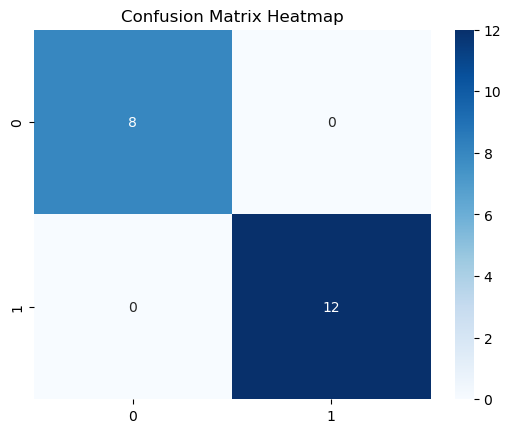

In [69]:
# Visualizations
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.show()

In [72]:
# Prediction on New Data
# Load new data (Example: Replace with your actual new dataset)
new_data = pd.read_csv("new_iris_data.csv")

# Scale the new data using the saved scaler
new_data_scaled = scaler.transform(new_data)

# Make predictions
predictions = model.predict(new_data_scaled)
new_data['Predictions'] = predictions
print("New Data Predictions:\n", new_data)

New Data Predictions:
     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  Predictions
0                 5.1               3.5  ...               0.2            0
1                 4.9               3.0  ...               0.2            0
2                 4.7               3.2  ...               0.2            0
3                 4.6               3.1  ...               0.2            0
4                 5.0               3.6  ...               0.2            0
5                 5.4               3.9  ...               0.4            0
6                 4.6               3.4  ...               0.3            0
7                 5.0               3.4  ...               0.2            0
8                 4.4               2.9  ...               0.2            0
9                 4.9               3.1  ...               0.1            0
10                5.4               3.7  ...               0.2            0
11                4.8               3.4  ...               0.2   